# Introduction to Jupyter Notebook and rasterio
This tutorial will explain how to set up Jupyter Notebook with rasterio and cover some basics of working with satellite imagery in Python.  This tutorial builds off the Planet Labs tutorial found at: https://github.com/planetlabs/notebooks/blob/685af7b7879b82a06de4fdfe550c7d8e7c3bf867/jupyter-notebooks/getting-to-know-sat-imagery/Visualizing%20Satellite%20Imagery.ipynb



## Setup
We will be using Jupyter Notebook in the python environment with the rasterio and matplotlib libraries.

### Installation
#### Anaconda method
Download Anaconda-Navigator: https://www.anaconda.com/download/

Create a new environment: Environments >> Create Environment

Search for and install ```rasterio``` (>=v1.0.13) and ```matplotlib``` (>=v3.0.2)

#### Alternative for Mac OS
You can install ```rasterio``` and ```matplotlib``` from command line using ```pip```:

```pip install rasterio```

```pip install matplotlib```

It is possible to use ```pip``` to install the packages on Windows as well, but the installation of rasterio is slightly more involved: https://rasterio.readthedocs.io/en/latest/installation.html


### Launch Jupyter Notebook
If you installed Jupyter through Anaconda, go to the Home page, select the environment you set up early, find Jupyter Notebook under applications, and click Launch.


If you installed Jupyter using pip, go to command line, and type ```jupyter notebook```

### Extra resources
Jupyter Notebook Basics: https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb

Jupyter Notebook Examples:
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/examples_index.html

Planet Labs Satellite Imagery Python Tutorials:
https://github.com/planetlabs/notebooks/tree/685af7b7879b82a06de4fdfe550c7d8e7c3bf867/jupyter-notebooks/getting-to-know-sat-imagery

Rasterio documentation: 
https://rasterio.readthedocs.io/en/stable/

Matplotlib documentation:
https://matplotlib.org/


## Read in data

In [2]:
# Import rasterio and matplotlib
import rasterio
from matplotlib import pyplot as plt

# Set the path to the GeoTIFF file, here we are using a PlanetScope 4-band image
tiff_file = 'example.tif'

# Read in satellite image with rasterio
satdat = rasterio.open(tiff_file)

satdat #The image has been opened as a DatasetReader object

<open DatasetReader name='example.tif' mode='r'>

In [3]:
# Extract the four bands from the satdat object with the .read() method
b, g, r, n = satdat.read()

b #the bands are loaded as numerical 2d arrays

array([[7261, 7137, 7087, ..., 7015, 6868, 6891],
       [7180, 7076, 7166, ..., 7387, 7391, 7431],
       [7424, 7436, 7443, ..., 7497, 7713, 7760],
       ...,
       [7791, 7840, 8139, ..., 7108, 7086, 7267],
       [7873, 8132, 8441, ..., 7134, 7023, 7042],
       [8320, 8464, 8542, ..., 6893, 6921, 6989]], dtype=uint16)

## Visualization

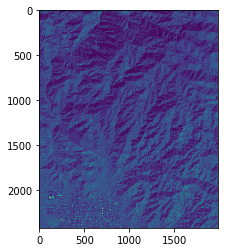

In [4]:
# Plot the blue band using matplotlib (plt.imshow)
plt.imshow(b)

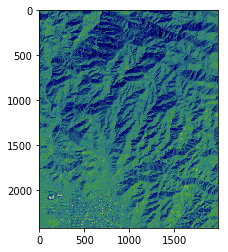

In [5]:
# Plot the green band and add a green colormap
# colormaps: https://matplotlib.org/users/colormaps.html
green_fig = plt.imshow(g)
green_fig.set_cmap('gist_earth')


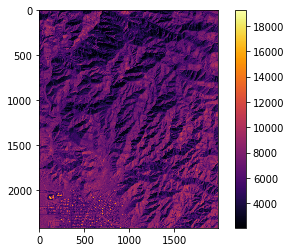

In [6]:
# Red band with colorbar
red_fig = plt.imshow(r, cmap='inferno')
plt.colorbar()
plt.show()

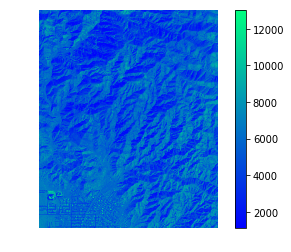

In [7]:
# NIR band with colorbar and remove axis 
nir_fig = plt.imshow(n, cmap='winter')
plt.colorbar()
plt.axis('off')
plt.show()

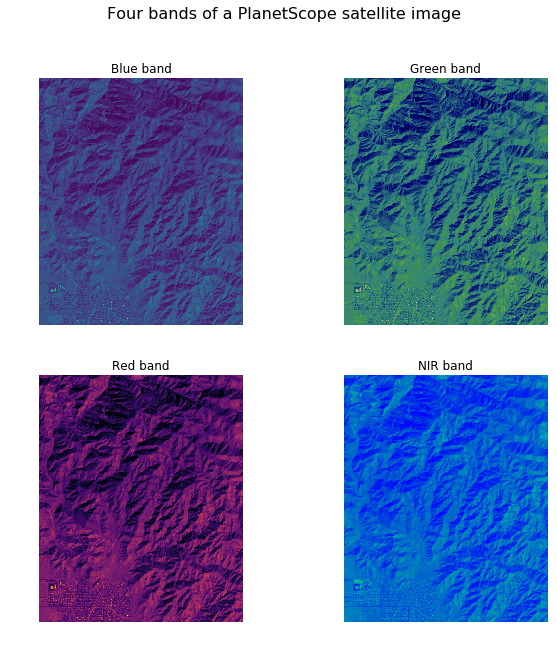

In [8]:
# Plot all four in a 4-paneled figure
fig4,([ax1,ax2],[ax3,ax4]) = plt.subplots(nrows=2,ncols=2,figsize=(10, 10))
ax1.imshow(b)
ax1.axis('off')
ax1.set_title("Blue band")
ax2.imshow(g,cmap='gist_earth')
ax2.axis('off')
ax2.set_title("Green band")
ax3.imshow(r,cmap='inferno')
ax3.axis('off')
ax3.set_title("Red band")
ax4.imshow(n,cmap='winter')
ax4.axis('off')
ax4.set_title("NIR band")
fig4.suptitle("Four bands of a PlanetScope satellite image", fontsize=16)
plt.show()

## Raster calculations

In [9]:
ndwi = (g-n)/(g+n) #(green-NIR)/(green+NIR)
ndwi

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

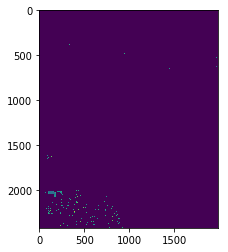

In [10]:
plt.imshow(ndwi)
plt.show()

## Subsetting

In [11]:
# Subset with built-in Python functionality:
ndwi_subset=ndwi[1900:,0:1000] #rows: 1900-end, columns:0-999
import numpy as np
ncells = np.ma.size(ndwi_subset)
nrows = np.size(ndwi_subset,0)
ncols = np.size(ndwi_subset,1)
print("Number of cells: " + str(ncells))
print("Number of rows: {0:3.0f} \nNumber of columns: {1:4.2f}".format(nrows, ncols))

Number of cells: 523000
Number of rows: 523 
Number of columns: 1000.00


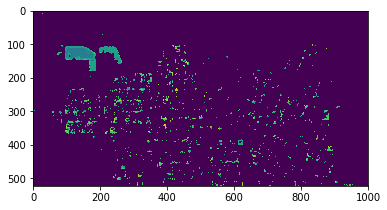

In [12]:
plt.imshow(ndwi_subset)

In [13]:
# Subset with rasterio Window:
from rasterio.windows import Window
bs, gs, rs, ns = satdat.read(window=Window.from_slices((1900, 2423), (0, 1000)))


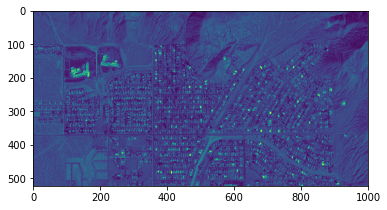

In [14]:
plt.imshow(bs)

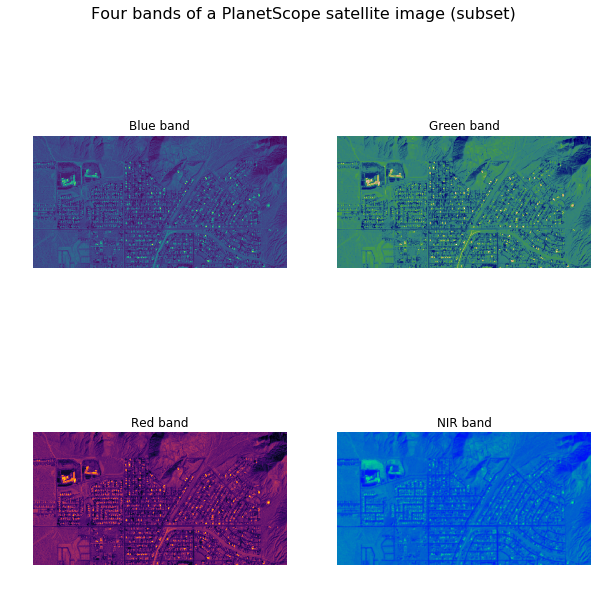

In [15]:
# Plot all four subsets in a 4-paneled figure
fig4s,([ax1,ax2],[ax3,ax4]) = plt.subplots(nrows=2,ncols=2,figsize=(10, 10))
ax1.imshow(bs)
ax1.axis('off')
ax1.set_title("Blue band")
ax2.imshow(gs,cmap='gist_earth')
ax2.axis('off')
ax2.set_title("Green band")
ax3.imshow(rs,cmap='inferno')
ax3.axis('off')
ax3.set_title("Red band")
ax4.imshow(ns,cmap='winter')
ax4.axis('off')
ax4.set_title("NIR band")
fig4s.suptitle("Four bands of a PlanetScope satellite image (subset)", fontsize=16)
plt.show()